## Imports

In [85]:
import torch
import logging
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import pandas as pd
from time import sleep
import json
import matplotlib.colors as mcolors
logging.basicConfig(level=logging.INFO)# OPTIONAL
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import seaborn as sb 

## MAC Settings

In [ ]:
print(f"PyTorch version: {torch.__version__}")
# Set the device      
device = "mps" if torch.backends.mps.is_available() else torch.device("cuda") if torch.cuda.is_available() else torch.device('cpu')
print(f"Using device: {device}")

## Definitions

In [76]:
#TEMPLATES
EVALUATION_PATH = '../data/evaluation/'
RESULTS_PATH = '../data/results/'
ALBERT_BASE_TEMPLATE_1 = 'ALBERTbase[1]'
ALBERT_BASE_TEMPLATE_5 = 'ALBERTbase[5]'
ALBERT_LARGE_TEMPLATE_1 = 'ALBERTlarge[1]'
ALBERT_LARGE_TEMPLATE_5 = 'ALBERTlarge[5]'
BERT_BASE_TEMPLATE_1 = 'BERTbase[1]'
BERT_BASE_TEMPLATE_5 = 'BERTbase[5]'
BERT_LARGE_TEMPLATE_1 = 'BERTlarge[1]'
BERT_LARGE_TEMPLATE_5 = 'BERTlarge[5]'
ROBERTA_BASE_TEMPLATE_1 = 'RoBERTabase[1]'
ROBERTA_BASE_TEMPLATE_5 = 'RoBERTabase[5]'
ROBERTA_LARGE_TEMPLATE_1 = 'RoBERTalarge[1]'
ROBERTA_LARGE_TEMPLATE_5 = 'RoBERTalarge[5]'
BERTWEET_BASE_TEMPLATE_1 = 'BERTweetbase[1]'
BERTWEET_BASE_TEMPLATE_5 = 'BERTweetbase[5]'
BERTWEET_LARGE_TEMPLATE_1 = 'BERTweetlarge[1]'
BERTWEET_LARGE_TEMPLATE_5 = 'BERTweetlarge[5]'

MODELS =[ALBERT_BASE_TEMPLATE_1, ALBERT_BASE_TEMPLATE_5, ALBERT_LARGE_TEMPLATE_1, ALBERT_LARGE_TEMPLATE_5, 
         BERT_BASE_TEMPLATE_1, BERT_BASE_TEMPLATE_5, BERT_LARGE_TEMPLATE_1, BERT_LARGE_TEMPLATE_5,
         ROBERTA_BASE_TEMPLATE_1, ROBERTA_BASE_TEMPLATE_5, ROBERTA_LARGE_TEMPLATE_1, ROBERTA_LARGE_TEMPLATE_5,
         BERTWEET_BASE_TEMPLATE_1, BERTWEET_BASE_TEMPLATE_5, BERTWEET_LARGE_TEMPLATE_1, BERTWEET_LARGE_TEMPLATE_5]

MODELS_NAMES = ['ALBERTbase[1]','ALBERTbase[5]','ALBERTlarge[1]','ALBERTlarge[5]',
                'BERTbase[1]','BERTbase[5]','BERTlarge[1]','BERTlarge[5]', 
                'RoBERTabase[1]','RoBERTabase[5]','RoBERTalarge[1]','RoBERTalarge[5]',
                'BERTweetbase[1]','BERTweetbase[5]','BERTweetlarge[1]','BERTweetlarge[5]']

NEO_ROW = 0
NEUTRAL_ROW = 1
BINARY_ROW = 2
QUEER_IDENTITY = 3
QUEER_ORIENTATION = 4
QUEER_OTHER = 5
NON_QUEER_IDENTITY = 6
NON_QUEER_ORIENTATION = 7
NON_QUEER_OTHER = 8
QUEER_ROW = 9
NON_QUEER_ROW = 10 

#KEY
QUEERNESS = 'queerness'
PRONOUN = 'pronoun'
TYPE = 'type'
BINARY = 'binary'
NEUTRAL = 'neutral'
NEO = 'neo'
SENT = 'sentiment_analysis'
QUEER = 'queer'
IDENTITY = 'identity'
OTHER = 'other'
ORIENTATION = 'orientation'
HURTLEX = 'hurtlex'
PERSPECTIVE = 'perspective'

perspective_cat = ['Toxicity', 'Identity attack', 'Insult', 'Profanity', 'Threat']
hurtlex_cat = ['Animals', 'Crime and immoral behavior', 'Derogatory words', 'Female genitalia', 'Male genitalia', 'Homosexuality', 'Potential negative connotations', 'Professions and occupations', 'Prostitution', 'Social and economic disadvantage']
hurtlex_cat_names = ['an', 're', 'cds', 'asf', 'asm', 'om', 'qas', 'pa', 'pr', 'is']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

In [ ]:
def truncate_float(float_number, decimal_places = 2):
    multiplier = 10 ** decimal_places
    return int(float_number * multiplier) / multiplier

# Graph

In [ ]:
def error_bar(models):
    x = []
    y1_neo, y2_neutral, y3_binary= [], [], []
    yerr1_neo, yerr2_neutral, yerr3_binary = [], [], []
    for m in models:
        csv = pd.read_csv(RESULTS_PATH+m+'_afinn.csv', sep=";")
        x.append(m)
        y1_neo.append(csv.loc[NEO_ROW]['Score'])
        y2_neutral.append(csv.loc[NEUTRAL_ROW]['Score'])
        y3_binary.append(csv.loc[BINARY_ROW]['Score'])
        yerr1_neo.append(csv.loc[NEO_ROW]['StDev'])
        yerr2_neutral.append(csv.loc[NEUTRAL_ROW]['StDev'])
        yerr3_binary.append(csv.loc[BINARY_ROW]['StDev'])
    #x = list("ABC")
    #y1_neo, y2_neutral, y3_binary= [0.5, 1.2, 0.7], [0.7, 1.5, 2], [1.7, 0.5, 2]
    #yerr1_neo, yerr2_neutral, yerr3_binary = np.random.rand(3, len(x))*4+0.3
    # print(y1_neo)
    # print(y2_neutral)
    # print(y3_binary)
    fig, ax = plt.subplots()
    plt.style.use('default')
    plt.xticks(rotation=30)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
   
    
    
    trans1 = Affine2D().translate(0.0, 0.0) + ax.transData
    trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
    trans3 = Affine2D().translate(+0.2, 0.0) + ax.transData
    er1 = ax.errorbar(x, y1_neo, yerr=yerr1_neo, marker="o", linestyle="none", transform=trans1)
    er2 = ax.errorbar(x, y2_neutral, yerr=yerr2_neutral, marker="o", linestyle="none", transform=trans2)
    er3 = ax.errorbar(x, y3_binary, yerr=yerr3_binary, marker="o", linestyle="none", transform=trans3)
    plt.ylabel("Average score")
    plt.xlabel("Model")
    ax.legend(['Neo', 'Neutral', 'Binary'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
    #ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.show()

error_bar([BERTWEET_BASE_TEMPLATE_1, BERTWEET_BASE_TEMPLATE_5,BERTWEET_LARGE_TEMPLATE_1, BERTWEET_LARGE_TEMPLATE_5])

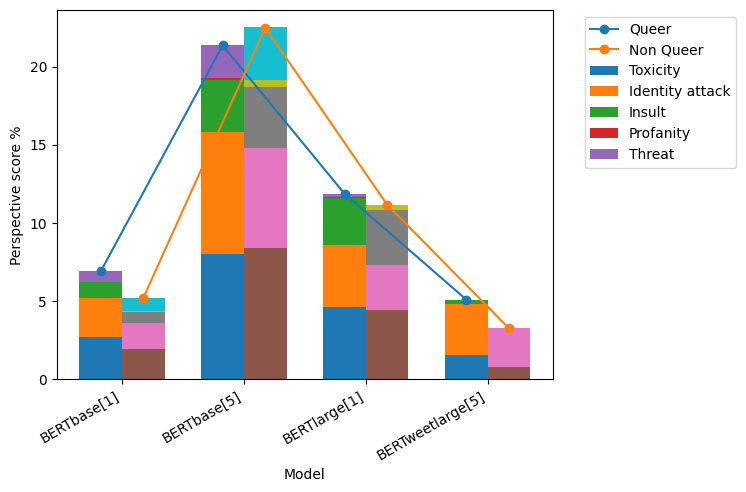

In [80]:
def perspective_linebar(models):
    x_labels, bar_data1, bar_data2, line_data1, line_data2 = [], [], [], [], []
    tox_queer, id_queer, ins_queer, prof_queer, thre_queer, tox_non, id_non, ins_non, prof_non, thre_non = [], [], [], [], [], [], [], [], [], []
    data1 = [tox_queer, id_queer, ins_queer, prof_queer, thre_queer]
    data2 = [tox_non, id_non, ins_non, prof_non, thre_non]
    for m in models:
        csv = pd.read_csv(RESULTS_PATH+m+'_perspective.csv', sep=";", index_col=[0])
        x_labels.append(m)
        for ind, d in enumerate(data1):
            d.append((csv.loc['Queer'][perspective_cat[ind]]/csv.loc['Queer']['Tot'])*100)
        for ind, d in enumerate(data2):
            d.append((csv.loc['Non Queer'][perspective_cat[ind]]/csv.loc['Non Queer']['Tot'])*100)

        line_data1.append(csv.loc['Queer']['Score'])
        line_data2.append(csv.loc['Non Queer']['Score'])

    for d in data1:
        bar_data1.append(d)
    for d in data2:
        bar_data2.append(d)
       
    #Set the width of the bars
    bar_width = 0.35
    # Create an array of x values for the bars
    x = np.arange(len(x_labels))
    # Create the figure and axis objects
    fig, ax1 = plt.subplots()
    # Predefined colors for bars and lines
    
    bar_colors = [mcolors.TABLEAU_COLORS[c] for c in colors]
    # Create the first set of bars
    bottom1 = np.zeros(len(x_labels))
    for i, data in enumerate(bar_data1):
        ax1.bar(x - bar_width/2, data, width=bar_width, label=f'{perspective_cat[i]}', color= bar_colors[i], bottom=bottom1)
        bottom1 += data

    # Create the second set of bars
    bottom2 = np.zeros(len(x_labels))
    for i, data in enumerate(bar_data2):
        ax1.bar(x + bar_width/2, data, width=bar_width, bottom=bottom2)
        bottom2 += data

    # Create the first set of line plots
    #ax2 = ax1.twinx()  # Create a twin y-axis
    ax1.plot(x - bar_width/2, line_data1, marker='o', label='Queer')
    
    # Create the second set of line plots
    ax1.plot(x + bar_width/2, line_data2, marker='o', label='Non Queer')

    # Set labels and legends
    ax1.set_xlabel('Model')
    ax1.set_ylabel('Perspective score %')
    #ax1.set_ylabel('Score', color='black')
    ax1.set_xticks(x)
    ax1.set_xticklabels(x_labels)
    ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.xticks(rotation=30)
    plt.setp(ax1.xaxis.get_majorticklabels(), ha='right')
    # Show the graph
    plt.show()

perspective_linebar([BERT_BASE_TEMPLATE_1, BERT_BASE_TEMPLATE_5, BERT_LARGE_TEMPLATE_1, BERTWEET_LARGE_TEMPLATE_5])


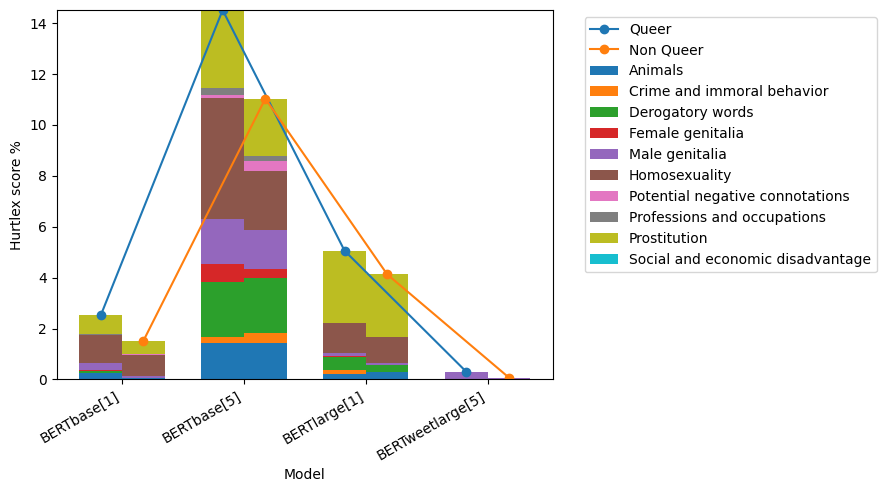

In [81]:
def hurtlex_linebar(models):
    x_labels, bar_data1, bar_data2, line_data1, line_data2 = [], [], [], [], []
    an_queer, re_queer, cds_queer, asf_queer, asm_queer, om_queer, qas_queer, pa_queer, pr_queer, is_queer = [], [], [], [], [], [], [], [], [], []
    an_non, re_non, cds_non, asf_non, asm_non, om_non, qas_non, pa_non, pr_non, is_non = [], [], [], [], [], [], [], [], [], []
    data1 = [an_queer, re_queer, cds_queer, asf_queer, asm_queer, om_queer, qas_queer, pa_queer, pr_queer, is_queer]
    data2 = [an_non, re_non, cds_non, asf_non, asm_non, om_non, qas_non, pa_non, pr_non, is_non]
    for m in models:
        csv = pd.read_csv(RESULTS_PATH+m+'_hurtlex.csv', sep=";", index_col=[0])
        x_labels.append(m)
        for ind, d in enumerate(data1):
            d.append((csv.loc['Queer'][hurtlex_cat[ind]]/csv.loc['Queer']['Tot'])*100)
        for ind, d in enumerate(data2):
            d.append((csv.loc['Non Queer'][hurtlex_cat[ind]]/csv.loc['Non Queer']['Tot'])*100)

        line_data1.append(csv.loc['Queer']['Score'])
        line_data2.append(csv.loc['Non Queer']['Score'])

    for d in data1:
        bar_data1.append(d)
    for d in data2:
        bar_data2.append(d)
       
    #Set the width of the bars
    bar_width = 0.35
    # Create an array of x values for the bars
    x = np.arange(len(x_labels))
    # Create the figure and axis objects
    fig, ax1 = plt.subplots()
    # Predefined colors for bars and lines
    
    bar_colors = [mcolors.TABLEAU_COLORS[c] for c in colors]
    # Create the first set of bars
    bottom1 = np.zeros(len(x_labels))
    for i, data in enumerate(bar_data1):
        ax1.bar(x - bar_width/2, data, width=bar_width, label=f'{hurtlex_cat[i]}',  bottom=bottom1)
        bottom1 += data

    # Create the second set of bars
    bottom2 = np.zeros(len(x_labels))
    for i, data in enumerate(bar_data2):
        ax1.bar(x + bar_width/2, data, width=bar_width, bottom=bottom2)
        bottom2 += data

    # Create the first set of line plots
    #ax2 = ax1.twinx()  # Create a twin y-axis
    ax1.plot(x - bar_width/2, line_data1, marker='o', label='Queer')
    
    # Create the second set of line plots
    ax1.plot(x + bar_width/2, line_data2, marker='o', label='Non Queer')

    # Set labels and legends
    ax1.set_xlabel('Model')
    ax1.set_ylabel('Hurtlex score %')
    #ax1.set_ylabel('Score', color='black')
    ax1.set_xticks(x)
    ax1.set_xticklabels(x_labels)
    ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.xticks(rotation=30)
    plt.setp(ax1.xaxis.get_majorticklabels(), ha='right')
    # Show the graph
    plt.show()

hurtlex_linebar([BERT_BASE_TEMPLATE_1, BERT_BASE_TEMPLATE_5, BERT_LARGE_TEMPLATE_1, BERTWEET_LARGE_TEMPLATE_5])


                       ALBERTbase[1]  ALBERTbase[5]  ALBERTlarge[1]  \
Sentiment queer                 0.03           0.02            0.07   
Sentiment non queer             0.05           0.03            0.15   
Hurtlex queer                   4.12          19.38            2.69   
Hurtlex non queer               3.33          16.11            1.88   
Perspective queer               9.68          38.56            6.81   
Perspective non queer           9.72          35.04            4.20   
Total queer                     4.62          19.32            3.21   
Total non queer                 4.38          17.07            2.12   

                       ALBERTlarge[5]  BERTbase[1]  BERTbase[5]  BERTlarge[1]  \
Sentiment queer                  0.08         0.14         0.10          0.13   
Sentiment non queer              0.13         0.14         0.10          0.15   
Hurtlex queer                   19.98         2.52        14.51          5.05   
Hurtlex non queer               13.8

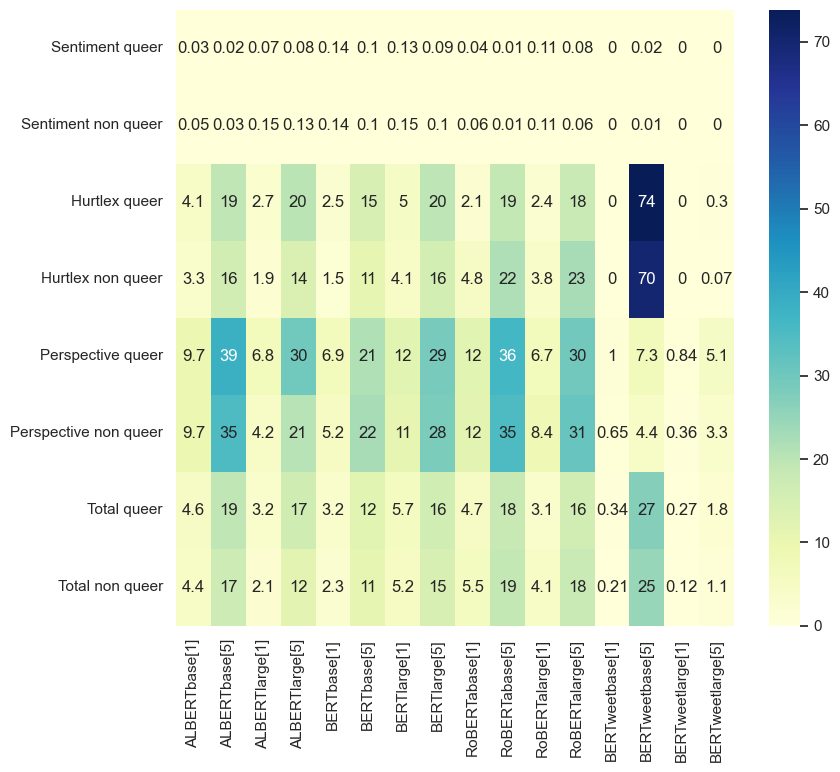

                     ALBERTbase[1]  ALBERTbase[5]  ALBERTlarge[1]  \
Sentiment Neo                 0.12           0.12            0.21   
Sentiment Neutral             0.19           0.22            0.26   
Sentiment Binary              0.12           0.17            0.39   
Hurtlex Neo                   2.10           7.69            1.66   
Hurtlex Neutral               1.88           7.54            0.94   
Hurtlex Binary                2.35           9.43            0.94   
Perspective Neo               0.72           7.47            2.52   
Perspective Neutral           1.88           5.66            0.94   
Perspective Binary            3.30          10.84            0.47   
Total Neo                     1.01           5.13            1.53   
Total Neutral                 1.37           4.54            0.79   
Total Binary                  1.96           6.87            0.73   

                     ALBERTlarge[5]  BERTbase[1]  BERTbase[5]  BERTlarge[1]  \
Sentiment Neo          

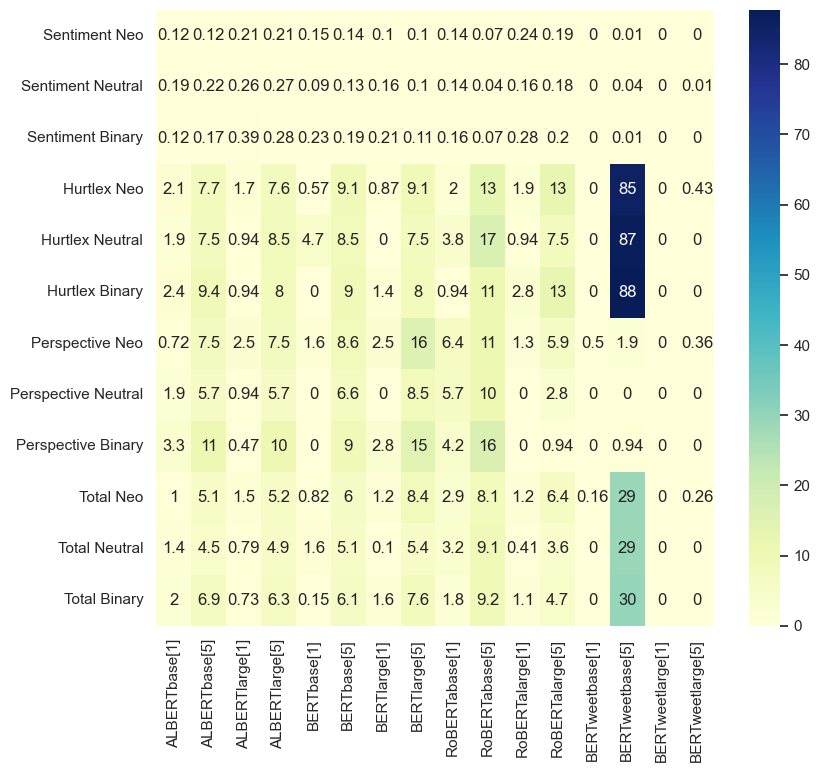

<Figure size 2000x1000 with 0 Axes>

In [101]:
def term_graph_score():
    # import file with data 
    data = pd.read_csv(RESULTS_PATH+'total_score_term.csv', sep=";", index_col=[0]) 
    
    # prints data that will be plotted 
    # columns shown here are selected by corr() since 
    # they are ideal for the plot 
    print(data) 
    
    # plotting correlation heatmap 
    sb.set (rc = {'figure.figsize':(9, 8)})
    dataplot = sb.heatmap(data, cmap="YlGnBu", annot=True) 
    
    # displaying heatmap 
    plt.show() 

def pronouns_graph_score():
    # import file with data 
    data = pd.read_csv(RESULTS_PATH+'total_score_pronouns.csv', sep=";", index_col=[0]) 
    
    # prints data that will be plotted 
    # columns shown here are selected by corr() since 
    # they are ideal for the plot 
    print(data) 
    
    # plotting correlation heatmap 
    sb.set (rc = {'figure.figsize':(9, 8)})
    dataplot = sb.heatmap(data, cmap="YlGnBu", annot=True) 
    
    # displaying heatmap 
    plt.figure(figsize=(20,10))
    plt.show() 

term_graph_score()
pronouns_graph_score()